In [3]:
%reload_ext autoreload
%aimport -pandas, -numpy
%autoreload 2
import pandas as pd
import numpy as np

import dmyplant2
dmyplant2.cred()
mp = dmyplant2.MyPlant(3600)
sn = 1184199
e=dmyplant2.Engine.from_sn(mp,sn, valstart='27.04.2020')
e.dash

{'Name': 'ROCHE PENZBERG KWKK',
 'Engine ID': 'M01',
 'Design Number': 'U233',
 'Engine Type': '624',
 'Engine Version': 'H02',
 'P': 24,
 'P_nom': 4489.3,
 'BMEP': 24.0,
 'serialNumber': '1184199',
 'id': 108532,
 'Count_OpHour': 39529.0,
 'val start': Timestamp('2020-04-27 00:00:00'),
 'oph@start': 0,
 'oph parts': 39529,
 'LOC': 0.0185}

In [4]:
from dfsm import msgFSM
fsm = msgFSM(e)
fsm.run()

8133034491it [00:09, 871556213.53it/s]                      


In [3]:
# from dfsm import msgFSM
# fsm = msgFSM(e, frompickle=True)

In [5]:
rdf = pd.DataFrame(fsm._starts)
rda = rdf
#rda = rdf[((rdf['mode'] == 'AUTO') & (rdf['success'] == True))]
#rda = rdf[((rdf['mode'] == 'AUTO') & (rdf['success'] == True) & (rdf['synchronize'] < 300.0) & (rdf['start-preparation'] < 300.0))]
#rda = rdf[((rdf['success'] == True) & (rdf['start-preparation'] < 1000.0))]
rda = rdf[((rdf['success'] == True))]
rda

,success,mode,starttime,endtime,cumtime,start-preparation,starter,hochlauf,idle,synchronize,net-parallel,mode-manual
5,True,AUTO,2016-06-27 04:55:07,2016-06-27 04:58:49,145.912,127.225999,0.908000,10.310000,5.953999,1.514000,0 days 00:01:15,NaN
6,True,AUTO,2016-06-27 05:11:22,2016-06-27 05:25:41,148.024,123.785000,0.907999,10.196000,6.062999,7.072000,0 days 00:11:51,NaN
11,True,AUTO,2016-06-27 06:22:27,2016-06-27 06:31:27,271.650,248.641000,0.907000,10.192999,6.149999,5.759000,0 days 00:04:28,NaN
24,True,AUTO,2016-06-27 10:09:06,1970-01-01 00:00:00,404.358,242.578000,0.908000,10.228999,146.498000,4.144999,0 days 00:38:16,NaN
47,True,MANUAL,2016-06-27 18:59:18,2016-06-27 20:51:51,563.450,251.667000,7.790000,15.820999,165.524999,122.647000,0 days 01:43:09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
474,True,AUTO,2022-01-17 14:28:10,2022-01-17 14:36:45,420.568,228.006000,5.830000,20.750999,159.627000,6.353999,0 days 00:01:34,NaN
475,True,MANUAL,2022-01-17 14:50:14,2022-01-17 15:01:07,563.302,438.923000,5.139000,17.916999,100.916999,0.406000,0 days 00:01:30,NaN
477,True,MANUAL,2022-01-25 14:11:26,2022-01-25 14:20:07,235.948,179.220000,4.651000,21.648000,7.457999,22.971000,0 days 00:04:45,NaN
478,True,MANUAL,2022-01-26 16:13:16,2022-01-26 16:21:12,235.115,181.072000,5.467000,19.343000,6.927000,22.305999,0 days 00:04:01,NaN


In [6]:
rda.describe().round(2)

,cumtime,start-preparation,starter,hochlauf,idle,synchronize,net-parallel,mode-manual
count,205.00,205.00,205.00,205.00,205.00,205.00,205,0.0
mean,817.60,690.84,5.87,24.42,32.19,64.28,1 days 11:28:21.556097560,NaN
std,2572.92,2516.67,1.46,31.14,69.01,555.82,2 days 13:18:30.522957425,NaN
min,145.91,123.78,0.91,10.19,5.95,0.41,0 days 00:00:00,NaN
25%,225.06,166.83,4.95,17.68,7.25,14.30,0 days 00:07:04,NaN
50%,291.11,214.88,5.35,19.00,9.11,20.92,0 days 02:05:42,NaN
75%,404.36,281.52,7.17,21.16,10.20,25.52,1 days 15:08:42,NaN
max,24127.50,24000.82,10.80,238.38,527.14,7940.31,14 days 02:32:47,NaN


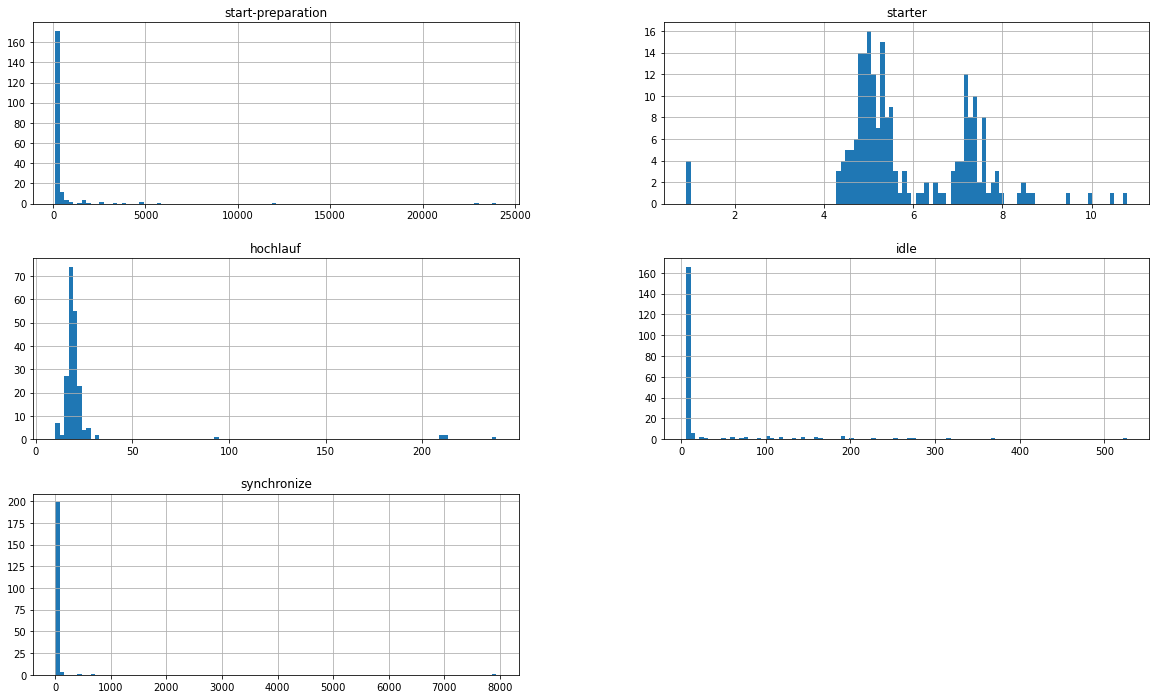

In [7]:
rda[['start-preparation','starter','hochlauf','idle','synchronize']].hist(figsize = (20,12), bins=100);

In [8]:
round((rdf[rdf.success].shape[0] / rdf.shape[0]) * 100,1)

42.7

In [9]:
fsm.states

{'coldstart': <dfsm.State at 0x1a5719c63a0>,
 'mode-off': <dfsm.State at 0x1a5719c6c70>,
 'mode-manual': <dfsm.State at 0x1a5719c6670>,
 'mode-automatic': <dfsm.State at 0x1a5719c6eb0>,
 'start-preparation': <dfsm.State at 0x1a5719c6700>,
 'starter': <dfsm.State at 0x1a5719c6760>,
 'hochlauf': <dfsm.State at 0x1a5719c66d0>,
 'idle': <dfsm.State at 0x1a5719c6370>,
 'synchronize': <dfsm.State at 0x1a5719c63d0>,
 'net-parallel': <dfsm.State at 0x1a5719c6d90>}

In [13]:
fsm.alarms_pareto(['start-preparation','starter','hochlauf','idle','synchronize'])

,anz,name,msg
0,79,1056,Fail safe loop tripped
1,35,2284,Oil pan filling level maximum
2,28,1031,Emergency stop / safety loop
3,21,3003,Measuring signal failure
4,17,1019,Jacket water pressure low
...,...,...,...
70,1,3351,Failure active filter
71,1,2277,Generator voltage low 2
72,1,1033,Heating water temperature high
73,1,3336,SAFI trigger pickup missing
